In [2]:
# Import relevant libraries, packages, and modules.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
air_q_raw = pd.read_csv("./Raw_data/modified_c4_epa_air_quality.csv")
air_q_raw.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910


The `aqi_log` column represents AQI readings that were transformed logarithmically to suit the objectives of this lab. Taking a logarithm of the aqi to get a bell-shaped distribution is outside the scope of this course, but is helpful to see the normal distribution.

In [5]:
air_q_raw.shape

(260, 8)

In [6]:
air_q_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date_local        260 non-null    object 
 1   state_name        260 non-null    object 
 2   county_name       260 non-null    object 
 3   city_name         260 non-null    object 
 4   local_site_name   257 non-null    object 
 5   parameter_name    260 non-null    object 
 6   units_of_measure  260 non-null    object 
 7   aqi_log           260 non-null    float64
dtypes: float64(1), object(7)
memory usage: 16.4+ KB


In [8]:
air_q_raw.describe().round(2)

,aqi_log
count,260.00
mean,1.77
std,0.71
min,0.00
25%,1.10
50%,1.79
75%,2.30
max,3.93


In [9]:
air_q_raw.isna().sum()

date_local          0
state_name          0
county_name         0
city_name           0
local_site_name     3
parameter_name      0
units_of_measure    0
aqi_log             0
dtype: int64

<Axes: >

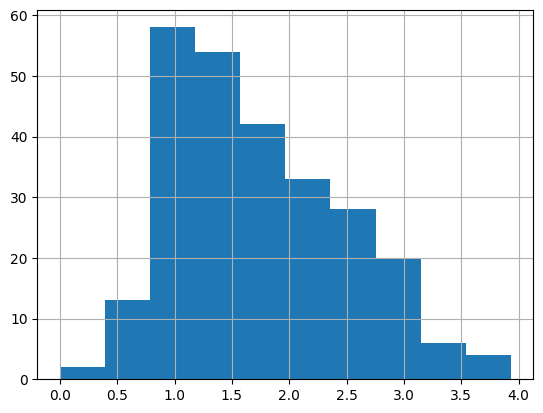

In [10]:
air_q_raw["aqi_log"].hist()

In [12]:
# Define variable for mean.
aqi_mean = air_q_raw["aqi_log"].mean()
print(f"Air quality mean: {aqi_mean:.3f}")

Air quality mean: 1.767


In [13]:
# Define variable for aqi_log standard deviation.
aqi_std = air_q_raw["aqi_log"].std()
print(f"Air standard deviation: {aqi_std:.3f}")

Air standard deviation: 0.715


In [17]:
# AQI_LOG 1 std away upper and lower 

aqi_low_1std = aqi_mean - aqi_std
aqi_up_1std = aqi_mean + aqi_std

print(f"Standard deviation limits {aqi_low_1std:.2f} and {aqi_up_1std:.2f}")

Standard deviation limits 1.05 and 2.48


In [22]:
points_percentage =((air_q_raw["aqi_log"] >= aqi_low_1std) & (air_q_raw["aqi_log"] < aqi_up_1std)).mean()
print(f"Data points falling into 1 std away from the mean: {points_percentage*100:.2f}%")

Data points falling into 1 std away from the mean: 76.15%


In [18]:
# AQI_LOG 2 std away 

aqi_low_2std = aqi_mean - (2*aqi_std)
aqi_up_2std = aqi_mean + (2*aqi_std)

print(f"Standard deviation limits {aqi_low_2std:.2f} and {aqi_up_2std:.2f}")

Standard deviation limits 0.34 and 3.20


In [23]:
points_percentage =((air_q_raw["aqi_log"] >= aqi_low_2std) & (air_q_raw["aqi_log"] < aqi_up_2std)).mean()
print(f"Data points falling into 1 std away from the mean: {points_percentage*100:.2f}%")

Data points falling into 1 std away from the mean: 95.77%


In [24]:
# AQI_LOG 2 std away 

aqi_low_3std = aqi_mean - (3*aqi_std)
aqi_up_3std = aqi_mean + (3*aqi_std)

print(f"Standard deviation limits {aqi_low_3std:.2f} and {aqi_up_3std:.2f}")

Standard deviation limits -0.38 and 3.91


In [25]:
points_percentage =((air_q_raw["aqi_log"] >= aqi_low_3std) & (air_q_raw["aqi_log"] < aqi_up_3std)).mean()
print(f"Data points falling into 1 std away from the mean: {points_percentage*100:.2f}%")

Data points falling into 1 std away from the mean: 99.62%


***
## Z-Score
***

In [26]:
air_q_raw["z-score"] = stats.zscore(air_q_raw["aqi_log"])
air_q_raw.head(10)

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z-score
0,2018-01-01,Arizona,Maricopa,Buckeye,BUCKEYE,Carbon monoxide,Parts per million,2.079442,0.438109
1,2018-01-01,Ohio,Belmont,Shadyside,Shadyside,Carbon monoxide,Parts per million,1.791759,0.034820
2,2018-01-01,Wyoming,Teton,Not in a city,Yellowstone National Park - Old Faithful Snow ...,Carbon monoxide,Parts per million,1.098612,-0.936873
3,2018-01-01,Pennsylvania,Philadelphia,Philadelphia,North East Waste (NEW),Carbon monoxide,Parts per million,1.386294,-0.533584
4,2018-01-01,Iowa,Polk,Des Moines,CARPENTER,Carbon monoxide,Parts per million,1.386294,-0.533584
5,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,2.708050,1.319328
6,2018-01-01,Hawaii,Honolulu,Not in a city,Kapolei,Carbon monoxide,Parts per million,1.098612,-0.936873
7,2018-01-01,Pennsylvania,Erie,Erie,NaN,Carbon monoxide,Parts per million,1.098612,-0.936873
8,2018-01-01,Hawaii,Honolulu,Honolulu,Honolulu,Carbon monoxide,Parts per million,1.791759,0.034820
9,2018-01-01,Colorado,Larimer,Fort Collins,Fort Collins - CSU - S. Mason,Carbon monoxide,Parts per million,1.945910,0.250917


In [27]:
outliers = air_q_raw[(air_q_raw["z-score"] < -3) | (air_q_raw["z-score"] >3)]
outliers

,date_local,state_name,county_name,city_name,local_site_name,parameter_name,units_of_measure,aqi_log,z-score
244,2018-01-01,Arizona,Maricopa,Phoenix,WEST PHOENIX,Carbon monoxide,Parts per million,3.931826,3.034886


In [28]:
air_q_raw.shape

(260, 9)

In [31]:
print(100-((outliers.shape[0] / air_q_raw.shape[0])*100))

99.61538461538461
